# MANU 465 EEG Project
## Exploring Brainwaves vs Creative and Analytical Tasks
### By: Faith Tan, Emilie Ho, and Pan Tisapramotkul 

## Project Overview and Summary

### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Constants used

In [44]:
### CONSTANTS ###

SAMPLING_RATE = 200
CREATIVE_DIR = 'dataset/Drawing/'
MATH_DIR = 'dataset/Mathematical/'

## Importing Raw Data Collected

In [ ]:
import os

# Get all the files path in the mathematical and creative directories appened in a list
math_files = [os.path.join(MATH_DIR, file) for file in os.listdir(MATH_DIR) if os.path.isfile(os.path.join(MATH_DIR, file))]
creative_files = [os.path.join(CREATIVE_DIR, file) for file in os.listdir(CREATIVE_DIR) if os.path.isfile(os.path.join(CREATIVE_DIR, file))]

## Data Preprocessing 

This is a SAMPLE way on how to perform FFT transform from the **raw data in microvolts** collected by MUSE Monitor

MUSE Monitor has 4 electrodes (TF9,AF7,AF8,TP10) that collects data as explained here: https://mind-monitor.com/Technical_Manual.php#help_graph_raw

The example below perform FFT on **AF7** data collected. 

After performing FFT, the peaks, amplitude, and area under the curve maybe be considered to use as features for ML models

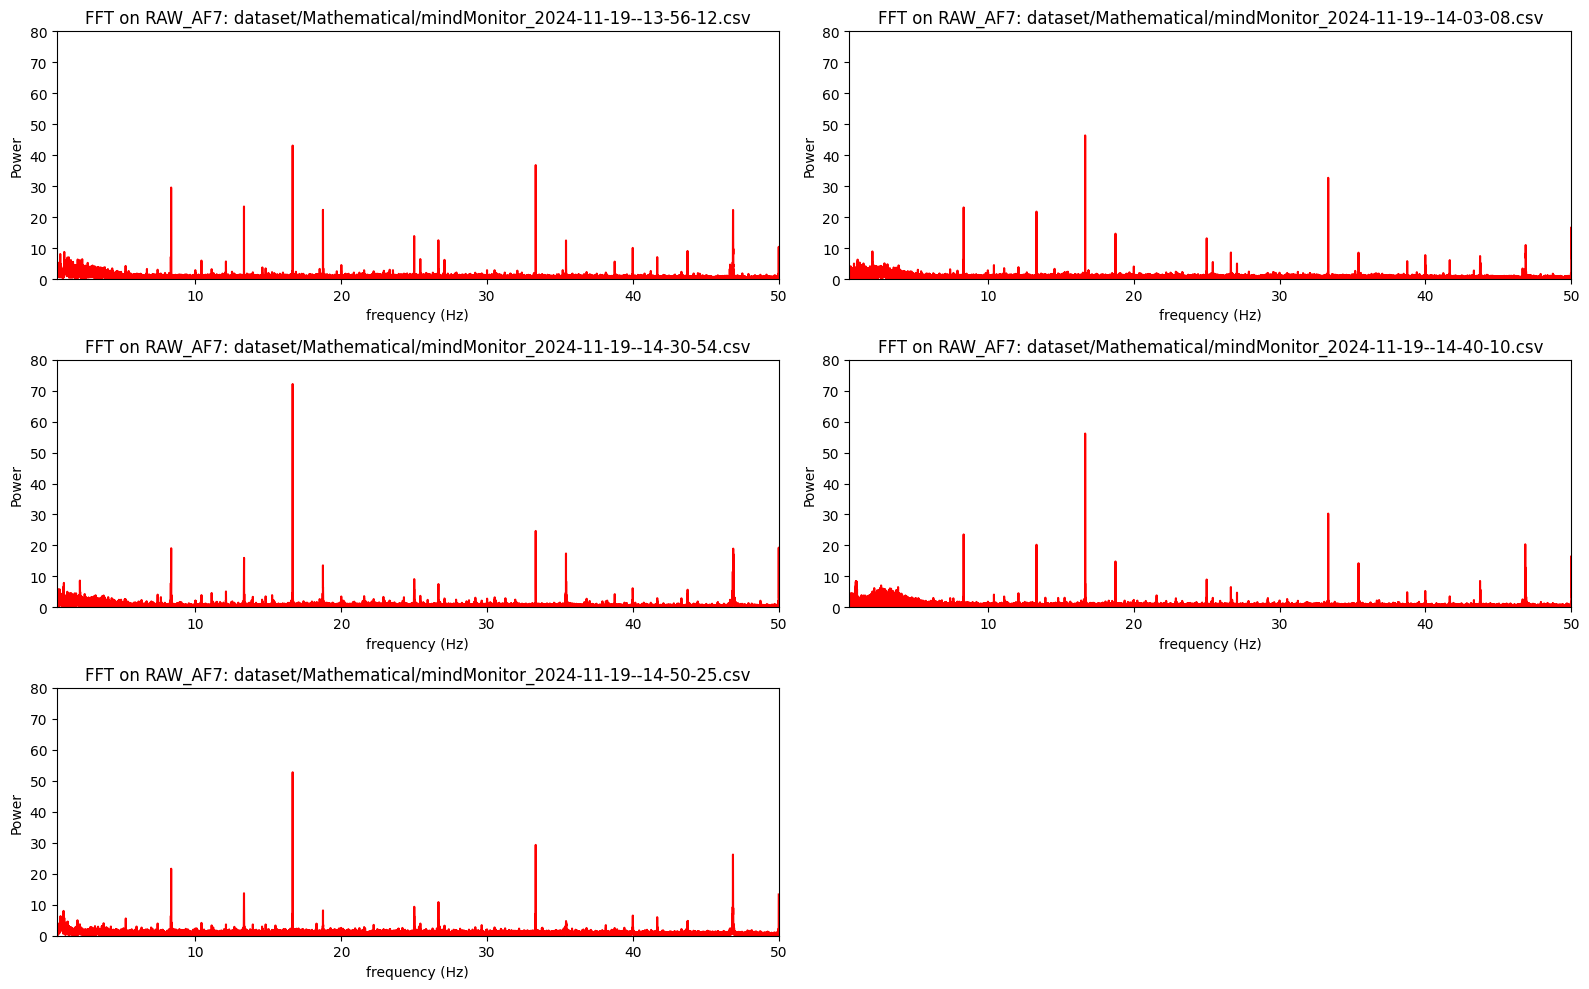

In [83]:
plt.figure(figsize=(16, 10)) 

for i, data in enumerate(math_files):
    dataset = pd.read_csv(data)
    dataset = dataset['RAW_AF7']
    dataset = dataset.dropna()

    # Perform FFT 
    n = len(dataset)                 # length of the signal
    k = np.arange(n)
    T = n/SAMPLING_RATE
    frq = k/T                 # two sides frequency range
    zz=int(n/2)

    freq = frq[range(zz)]           # one side frequency range
    Y = np.fft.fft(dataset)/n              # fft computing and normalization
    Y = Y[range(zz)]

    plt.subplot(3, 2, i+1)
    plt.plot(freq, abs(Y), 'r-')
    plt.xlabel('frequency (Hz)')
    plt.ylabel('Power')
    plt.ylim(0,80)
    plt.xlim(0.5, 50)
    plt.title("FFT on RAW_AF7: " + data)

plt.tight_layout()
plt.show()

## Feature Extration 

## Exploratory Data Analysis

### Splitting Dateset into the Training and Test Sets

### Feature Scaling

### Principal Component Analysis (PCA)

## Building Machine Learning Models

### Classification Model: Support Vector Machine

### Basic ANN Model